强化学习中有很多的概念，不是特别容易理解，所以本节的目的就是对常见的强化学习中的概念进行整理。（主要是从强化学习的重要论文中进行整理）
- rollout：在CS相关论文中，一般rollout表示一次试验，一条轨迹。就比如我们我们用MC仿真出了一个episode，这个episode就是一个rollout。
- episode：一条轨迹
- epoch：可能有多个轨迹，因为强化里面的epoch和深度学习的不一样，我在HER相关的论文里看到的epoch，是有50个episode组成的。
- trajectory：一条轨迹
- cycle:
- simulation step：智能体和环境的一次交互
- update step：网络更新一次

## 1.概率密度函数PDF $p(x)$ ：随机变量X取值x的可能性,X的domain为 $\mathcal{X}$

### 举例

- 看个具有连续分布的随机变量X的PDF，$p(x)=\frac{1}{\sqrt{2\pi{\sigma^2}}}exp(-\frac{(x-\mu)^2)}{2{\sigma^2}})$
- 看个离散分布的随机变量X的PDF  $X \in \{1,3,7\}, p(1)=0.2,p(3)=0.5,p(7)=0.3$

### 性质
 - 对于连续分布的随机变量X的PDF，有 $\int_{\mathcal X}{p(x)dx } = 1. $
 - 对于离散分布的随机变量X的PDF，有 $\sum_{x\in {\mathcal X}}{p(x)} = 1. $
 
### Expectations
 - 对于连续分布的随机变量X的$f(X)$，有 $\mathbb{E}[f(X)]=\int_{\mathcal X}{p(x).f(x)dx }. $
 - 对于离散分布的随机变量X的$f(X)$，有 $\mathbb{E}[f(X)]= \sum_{x\in {\mathcal X}}{p(x).f(x)} . $
 
 python中如何实现计算和可视化不同分布的概率密度函数，可以参考https://cloud.tencent.com/developer/article/1905801 （有空整理下！）

In [15]:
# python中用scipy.stats 定义了不同的概率分布，
# 计算正态分布N(0,1)在x=1出现的概率
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist
from scipy.stats import norm

mean = 0
std = 1
norm.pdf(0,mean,std)

0.3989422804014327

In [14]:
# python中用scipy.stats 定义了不同的概率分布，
# 计算正态分布N(0,1)在x=1出现的概率

#mean = 0
#std = 1
norm.cdf(1,mean,std)

0.8413447460685429

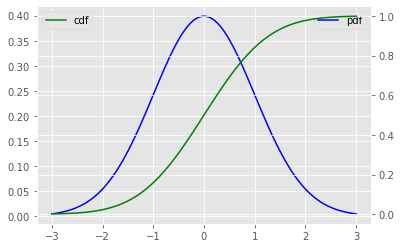

In [16]:
# 对pdf和cdf的结果进行可视化
# 正态分布 绘制pdf和cdf函数

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_index =  np.linspace(-3, 3, 100)
data_pdf_data = [norm.pdf(i, mean, std) for i in x_index] # pdf 数据
data_cdf_data = [norm.cdf(i, mean, std) for i in x_index] # cdf 数据
ax.plot(x_index, data_pdf_data, color='b', label='pdf')
ax_twin = ax.twinx() # 次坐标
ax_twin.plot(x_index, data_cdf_data, color='g', label='cdf')
ax.legend()
ax_twin.legend()


当 x 在 0-6 之间时，pdf 的值为固定值；cdf 在 x=6 的时候取值为 1


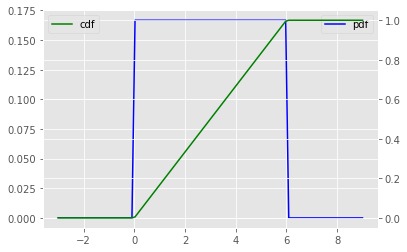

In [18]:
# 对pdf和cdf的结果进行可视化
# 均匀分布 绘制pdf和cdf函数

from scipy.stats import norm, uniform
# ########################
# 绘制均匀分布的 pdf 和 cdf 的函数
# ########################
loc = 0
scale = 6 # [loc, loc + scale]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_index =  np.linspace(-3, 9, 100)
data_pdf_data = [uniform.pdf(i, loc, scale) for i in x_index] # pdf 数据
data_cdf_data = [uniform.cdf(i, loc, scale) for i in x_index] # cdf 数据
ax.plot(x_index, data_pdf_data, color='b', label='pdf')
ax_twin = ax.twinx() # 次坐标
ax_twin.plot(x_index, data_cdf_data, color='g', label='cdf')
ax.legend()
ax_twin.legend()
print("当 x 在 0-6 之间时，pdf 的值为固定值；cdf 在 x=6 的时候取值为 1")

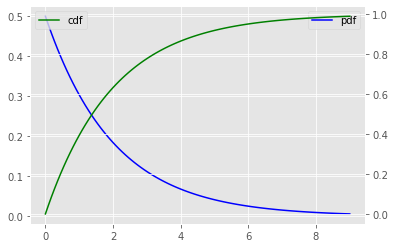

In [22]:
# 对pdf和cdf的结果进行可视化
# 指数分布 绘制pdf和cdf函数

from scipy.stats import norm, uniform, expon
# 绘制 pdf 和 cdf 的函数
loc = 0
scale = 2 # pdf = lambda * exp(-lambda * x), scale = 1 / lambda
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x_index =  np.linspace(0, 9, 100)
data_pdf_data = [expon.pdf(i, loc, scale) for i in x_index] # pdf 数据
data_cdf_data = [expon.cdf(i, loc, scale) for i in x_index] # cdf 数据
ax.plot(x_index, data_pdf_data, color='b', label='pdf')
ax_twin = ax.twinx() # 次坐标
ax_twin.plot(x_index, data_cdf_data, color='g', label='cdf')
ax.legend()
ax_twin.legend()

### 2. Random Sampling
强化学习中有存在着不确定性，不确定性主要来源于：
 - 状态转移的不确定性 => 随机变量S
 - 策略下动作选择的不确定性  =>  随机变量A
 
不确定性的存在，就对应着RL中的轨迹<s,a,r,s,a>中存在随机采样。

这样就产生了另外的随机变量：
 - 对于$i \ge t$, $R_i$ depends on $S_i$和$A_i$
 - 给定$s_t$, $U_t$依赖随机变量 $A_t,A_{t+1},A_{t+2},...$和$S_{t+1},S_{t+2},...$
 
   $U_t = R_t + \gamma R_{t+1} + \gamma^2R_{t+2} + \gamma^3R_{t+3}+...$
 
 基于$U_t$ 定义了RL的学习目标：就是累计奖励要最大！
 
 $Q_{\pi}(s_t,a_t) = \mathbb{E}[U_t|S_t=s_t,A_t=a_t]$ 
     - $Q_{\pi}(s_t,a_t)$ : Action-value function 给定策略$\pi$,能评估智能体在状态s下选择动作a有多好；
 
 $Q^*(s_t,a_t) = \sum\limits_{\pi}Q_{\pi}(s_t,a_t)$ 
 
 $V_{\pi}(s_t) = \mathbb{E}_A[Q_{\pi}(s_t,A)]$
     - $V_{\pi}(s_t)$: State-value function 给定策略$\pi$，能评估当前的状态s有多好，
     - $\mathbb{E}_S[V_{\pi}(S)]$ 能评估策略$\pi$有多好

In [21]:
# random sampling
from  numpy.random import choice

samples = choice(['R','G','B'], size = 100, p = [0.2,0.5,0.3])
print(samples)

['G' 'B' 'G' 'G' 'G' 'R' 'G' 'R' 'B' 'G' 'G' 'G' 'B' 'R' 'G' 'B' 'B' 'G'
 'R' 'R' 'B' 'G' 'B' 'G' 'G' 'R' 'G' 'G' 'G' 'G' 'G' 'B' 'G' 'G' 'B' 'B'
 'G' 'G' 'G' 'B' 'B' 'B' 'G' 'G' 'G' 'G' 'G' 'B' 'G' 'B' 'G' 'B' 'B' 'G'
 'G' 'G' 'B' 'B' 'G' 'G' 'G' 'R' 'G' 'G' 'R' 'G' 'G' 'R' 'B' 'G' 'B' 'B'
 'B' 'G' 'G' 'B' 'R' 'R' 'G' 'B' 'B' 'G' 'G' 'G' 'G' 'B' 'G' 'G' 'R' 'G'
 'G' 'G' 'B' 'R' 'B' 'B' 'G' 'G' 'B' 'G']


### 3. RL是学习啥呢？
RL的目标就是让累计奖励越大越好,要么学习策略，要么学习最优动作价值函数
1. 基于$U_t$的动作值函数和状态值函数，都是基于策略$\pi$的，就是要找一个合适的策略$\pi(a|s)$，使得
    - 在当前状态$s_t$
    - 随机采样：$a_t ~ \pi(.|s_t)$

2. 找到最优动作-值函数 $Q^*(s,a)$
    - 在当前状态$s_t$
    - 找到 最大化值得动作： $a_t = argmax_a Q^*(s_t,a) $

通过例子来理解下，但是例子跑起来是有错的，这个需要整理下。为啥会出现：

In [4]:
# !pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.6.1-py3-none-any.whl (180 kB)


In [10]:
# 熟悉下openAI gym
import gym
from stable_baselines3 import A2C

env = gym.make("CartPole-v1")
model = A2C("MlpPolicy",env, verbose=1)
model.learn(total_timesteps = 10000)

obs = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    #observation, reward, terminated, truncated, info = env.step(action)
    observation, reward, terminated, info = env.step(action)
    #if terminated or truncated:
    if terminated:
        observation = env.reset()
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 41.6     |
|    ep_rew_mean        | 41.6     |
| time/                 |          |
|    fps                | 1028     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.659   |
|    explained_variance | 0.0516   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.85     |
|    value_loss         | 13       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 33.1     |
|    ep_rew_mean        | 33.1     |
| time/                 |          |
|    fps                | 1085     |
|    iterations         | 200      |
|    time_elapsed 

上述问题可以参看下：https://github.com/hill-a/stable-baselines/issues/393